In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pyod

In [2]:
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.mcd import MCD
from pyod.models.knn import KNN  
from pyod.models.pca import PCA

In [3]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix



In [4]:
path_jeu = 'C:/Users/THINKPad/Desktop/ProjetInter/PIP_2022NA/DATA1/DONNEES_CONCAT_TLSE-LD/'
data=pd.read_csv(path_jeu+'donnee_v2_ech_train_transfo.csv',nrows = 100000)

In [117]:
path_jeu = 'C:/Users/THINKPad/Desktop/ProjetInter/PIP_2022NA/DATA1/DONNEES_CONCAT_TLSE-LD/'
data=pd.read_csv(path_jeu+'donnee_v2_ech_train_transfo.csv',chunksize = 100)
data

In [5]:
#df = pd.DataFrame(preprocessing.normalize(df),columns=df.columns)
#df = data.drop(columns= ["Unnamed: 0"])
df = data.drop(columns= ["Unnamed: 0","ID",'TOP_FRAUDE','TOP_FRAUDE_VIREMENT',"TOP_FRAUDE_CARTE"])
df

,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,NBJ_CNT_AGENCE_DEPOT_6M,NBJ_CNT_AGENCE_VENTE_6M,NBJ_CNT_RDV_AGENCE_6M,...,EPARGNE_LOGEMENT_ECART_M6_pos,EPARGNE_LOGEMENT_ECART_M6_neg,MONETAIRE_DISPONIBLE_pos,MONETAIRE_DISPONIBLE_neg,mt_reduc_ttc_M_pos,mt_reduc_ttc_M_neg,MONETAIRE_DISPONIBLE_M6_pos,MONETAIRE_DISPONIBLE_M6_neg,MONETAIRE_DISPONIBLE_ECART_M6_pos,MONETAIRE_DISPONIBLE_ECART_M6_neg
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,4.043051,0,0,0,4.043051,0,0.000000,0
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,7.170888,0,0,0,7.170888,0,0.000000,0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,7.496097,0,0,0,6.154858,0,7.170888,0
4,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0,9.642188,0,0,0,9.433564,0,7.937732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,7.244942,0,0,0,6.447306,0,6.594413,0
99996,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,8.343078,0,0,0,8.630700,0,0.000000,1
99997,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0
99998,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0.000000,0,0,0,0.000000,0,0.000000,0


In [6]:
df = pd.DataFrame(preprocessing.normalize(df),columns=df.columns)
df

,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,NBJ_CNT_AGENCE_DEPOT_6M,NBJ_CNT_AGENCE_VENTE_6M,NBJ_CNT_RDV_AGENCE_6M,...,EPARGNE_LOGEMENT_ECART_M6_pos,EPARGNE_LOGEMENT_ECART_M6_neg,MONETAIRE_DISPONIBLE_pos,MONETAIRE_DISPONIBLE_neg,mt_reduc_ttc_M_pos,mt_reduc_ttc_M_neg,MONETAIRE_DISPONIBLE_M6_pos,MONETAIRE_DISPONIBLE_M6_neg,MONETAIRE_DISPONIBLE_ECART_M6_pos,MONETAIRE_DISPONIBLE_ECART_M6_neg
0,0.000000,0.000000,0.000000,0.0,0.103256,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.000612,0.000612,0.000612,0.0,0.000612,0.000612,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.002476,0.0,0.0,0.0,0.002476,0.0,0.000000,0.000000
2,0.000236,0.000236,0.000000,0.0,0.000236,0.000236,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.001692,0.0,0.0,0.0,0.001692,0.0,0.000000,0.000000
3,0.000126,0.000126,0.000000,0.0,0.000126,0.000000,0.0,0.000000,0.0,0.000126,...,0.0,0.0,0.000946,0.0,0.0,0.0,0.000777,0.0,0.000905,0.000000
4,0.000024,0.000024,0.000000,0.0,0.000024,0.000024,0.0,0.000024,0.0,0.000000,...,0.0,0.0,0.000229,0.0,0.0,0.0,0.000224,0.0,0.000189,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0.000293,0.000000,0.0,0.000293,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.002126,0.0,0.0,0.0,0.001892,0.0,0.001935,0.000000
99996,0.000085,0.000085,0.000000,0.0,0.000085,0.000085,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000705,0.0,0.0,0.0,0.000730,0.0,0.000000,0.000085
99997,0.006269,0.006269,0.006269,0.0,0.006269,0.006269,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
99998,0.000695,0.000695,0.000000,0.0,0.000695,0.000695,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [7]:
categories=pd.read_csv(path_jeu+'categories.csv',sep = ';')
categories

,EQUIP,DIG,HB,SIGNA,ECO,AUTRE,Y
0,top_affecte,INDICMAIL,NBJ_CNT_AGENCE_DEPOT_6M,cp_ou_pays,SURFACE_FINANCIERE,top_situ_particuliere,TOP_FRAUDE
1,note_Funivers,INDICTEL,NBJ_CNT_AGENCE_VENTE_6M,SECTEUR_GESTION,ENCOURS_DAV,NaN,TOP_FRAUDE_VIREMENT
2,note_Fassu,INDICPOR,NBJ_CNT_RDV_AGENCE_6M,anciennete,MONETAIRE_DISPONIBLE,NaN,TOP_FRAUDE_CARTE
3,note_Fcredit,INDICSMS,NBJ_CNT_AUTOMATE_RETRAIT_6M,seg_nature_potentiel,MONETAIRE_BLOQUE,NaN,NaN
4,note_Fepargne,INDICMAILING,NBJ_CNT_AUTOMATES_DEPOT_6M,NB_PARTENAIRES,EMPRUNTS,NaN,NaN
...,...,...,...,...,...,...,...
135,NaN,NaN,mt_reduc_ttc_M6,NaN,NaN,NaN,NaN
136,NaN,NaN,mt_rist_ttc_M,NaN,NaN,NaN,NaN
137,NaN,NaN,mt_rist_ttc_M6,NaN,NaN,NaN,NaN
138,NaN,NaN,Fidelite_calcule,NaN,NaN,NaN,NaN


In [26]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [8]:
def evaluation2(
    pred: np.ndarray, y: np.ndarray, display=True):# -> list[int, int, int, int]:

    confusion_mat = confusion_matrix(y, pred)

    tn, fp, fn, tp = confusion_mat.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")

    return tn, fp, fn, tp

In [9]:
def evaluation3( score: np.ndarray, y: np.ndarray, percentage: float, display=True):
    """Evaluation with threshold

    Args:
        score (np.ndarray): Score for each individual, hight value => outlayer, low value => normal
        y (np.ndarray): True TOP_FRAUDE
        percentage (float): Threshold over 100 (example: 2%)
        display (bool, optional): display precision, recall, f1_score. Defaults to True.

    Returns:
        tp, fp, fn, tp
    """
    pred = score > sorted(score, key=lambda x: -x)[int(percentage / 100 * len(score))]

    confusion_mat = confusion_matrix(y, pred)

    tn, fp, fn, tp = confusion_mat.ravel()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)

    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")

    return tn, fp, fn, tp


# TestCategorieEco

In [10]:
#recuperer les variables eco
eco = []
for i in categories['ECO']:
    if pd.isna(i)==False:
        eco.append(i)
eco_array =  np.array(eco)
#enlever les variables inutiles
indexeco =  np.array([np.argwhere(eco_array =='solde_encours_pea'),
                                            np.argwhere(eco_array =='DEPENSES_RECURRENTES_EST_M'),
                                            np.argwhere(eco_array =='SOLD_MOY_DAV_PART_12M_P'),
                                            np.argwhere(eco_array =='mt_dernier_revenu_declare')])
eco_array =  np.delete(eco_array, indexeco)       

#np.argwhere(eco_array =='solde_encours_pea')

In [11]:
#selectionner donnees eco
df_eco = df[eco_array]
df2 = data['TOP_FRAUDE']
#df_eco = pd.concat([df2, df1], axis=1)
df_eco

,SURFACE_FINANCIERE,ENCOURS_DAV,MONETAIRE_DISPONIBLE,MONETAIRE_BLOQUE,EMPRUNTS,EPARGNE_LOGEMENT,SURFACE_FINANCIERE_M6,SURFACE_FINANCIERE_ECART_M6,ENCOURS_DAV_M6,ENCOURS_DAV_ECART_M6,...,mt_irregularite_incident_M,mt_irregularite_particuliere,mt_oblig,mt_oblig_cnca,mt_oblig_tiers,qt_PS,qt_actions,qt_oblig,qt_oblig_cnca,qt_oblig_tiers
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.734749,0.004288,0.034288,0.0,0.0,0.0,0.673520,0.025104,0.004288,0.025104,...,0.000612,0.0,0.0,0.0,0.0,0.001864,0.001864,0.0,0.0,0.0
2,0.353933,0.001213,0.306742,0.0,0.0,0.0,0.684271,-0.330338,0.001741,-0.330338,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.757111,0.001053,0.227133,0.0,0.0,0.0,0.328082,0.416411,0.000971,0.252370,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.653317,0.000203,0.365858,0.0,0.0,0.0,0.584422,0.071271,0.000205,-0.009028,...,0.000000,0.0,0.0,0.0,0.0,0.000072,0.000072,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.645646,0.001962,0.410866,0.0,0.0,0.0,0.557604,0.088043,0.002081,-0.123260,...,0.000000,0.0,0.0,0.0,0.0,0.000893,0.000893,0.0,0.0,0.0
99996,0.465007,0.000606,0.355096,0.0,0.0,0.0,0.625645,-0.160639,0.000634,-0.047346,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
99997,0.752270,0.030064,0.000000,0.0,0.0,0.0,0.507782,0.269564,0.027625,0.269564,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
99998,0.438045,0.004413,0.000000,0.0,0.0,0.0,0.764840,-0.333748,0.004870,-0.333748,...,0.000000,0.0,0.0,0.0,0.0,0.002582,0.002582,0.0,0.0,0.0


# ABOD-Cat:ECO

In [14]:
outliers_fraction = 0.01
clf = ABOD(contamination=outliers_fraction,n_neighbors = 5)
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [15]:
clf.fit(df_eco)

NameError: name 'df_eco' is not defined

In [18]:
score_pred = clf.decision_scores_*-1
score_pred = np.nan_to_num(score_pred) 
score_pred

array([0.00000000e+00, 3.51585514e+05, 5.40902355e+05, ...,
       1.55757218e+05, 5.40878747e+06, 1.38217173e+20])

In [19]:
y_pred = clf.predict(df_eco)
y_pred


C:\Python\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Python\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([0, 0, 0, ..., 0, 0, 0])

In [165]:
tn, fp, fn, tp = evaluation2(y_pred,df_eco["TOP_FRAUDE"])

TN / FP 
FN / TP
[[99851     0]
 [  149     0]]
Precision : nan
Recall : 0.0
F1_Score : nan


<ipython-input-164-2583a600d784>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


In [97]:
count = 0
for i, j in zip(list(score_pred > 1 - (0.2 / 100)), df_eco["TOP_FRAUDE"]):
    if i == j and i == 1:
        count += 1
print(count)

0


<ipython-input-20-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


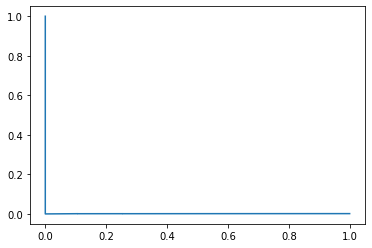

Air sous la courbe :  0.001252606385929021


In [24]:
value, f1_score, precision, recall = evaluation(score_pred, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

# KNN-Cat:ECO

In [ ]:


clf_name = 'kNN'
clf = KNN()
clf.fit(df_eco) 

y_train_pred = clf.labels_ 
y_train_scores = clf.decision_scores_ 

y_test_pred = clf.predict(df_eco)  
y_test_scores = clf.decision_function(df_eco)  

# MCD--Cat:Eco

In [61]:
clf_name = 'MCD'
clf = MCD()
clf.fit(df_eco)

C:\Python\lib\site-packages\sklearn\covariance\_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [62]:
    y_pred = clf.labels_ 
    y_scores = clf.decision_scores_



<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


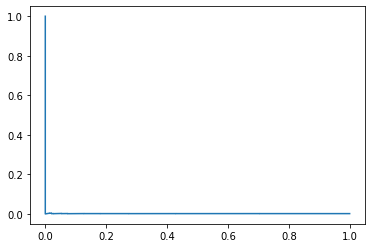

Air sous la courbe :  0.0015880208248976316


In [63]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [66]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],20)

TN / FP 
FN / TP
[[79881 19970]
 [  119    30]]
Precision : 0.0015
Recall : 0.20134228187919462
F1_Score : 0.0029778152761923667


# LOF Cat:Eco

In [41]:
clf_name = 'LOF'
clf = LOF()
clf.fit(df_eco)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [44]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


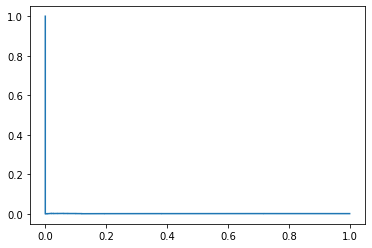

Air sous la courbe :  0.0015586645605129722


In [45]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [48]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99651   200]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


# HBOS  Cat:Eco

In [81]:
    clf_name = 'HBOS'
    clf = HBOS()
    clf.fit(df_eco)


HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [82]:
    y_pred = clf.labels_
    y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


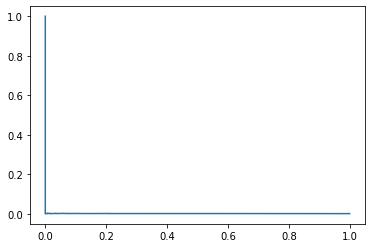

Air sous la courbe :  0.0018244920527525298


In [83]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [87]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99651   200]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


# IFOREST Cat:Eco

In [12]:
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(df_eco)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [13]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

In [14]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],20)

TN / FP 
FN / TP
[[79882 19969]
 [  118    31]]
Precision : 0.00155
Recall : 0.2080536912751678
F1_Score : 0.0030770757853987793


In [16]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99651   200]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


<ipython-input-20-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


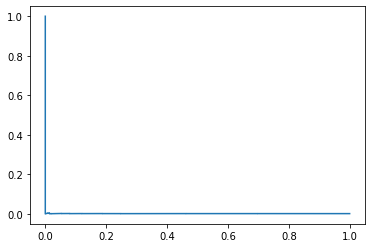

Air sous la courbe :  0.001610690396224186


In [43]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

# PCA Cat:ECO

In [102]:
clf_name = 'PCA'
clf = PCA(n_components=3)
clf.fit(df_eco)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=3,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [103]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


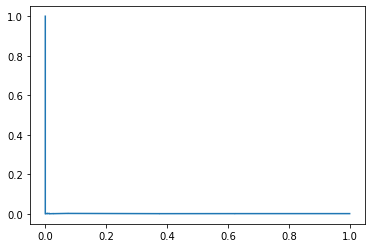

Air sous la courbe :  0.0015148517580360174


In [104]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [107]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],20)

TN / FP 
FN / TP
[[79882 19969]
 [  118    31]]
Precision : 0.00155
Recall : 0.2080536912751678
F1_Score : 0.0030770757853987793


# Test Categorie SIGNA

In [18]:
signa = []
for i in categories['SIGNA']:
    if pd.isna(i)==False:
        signa.append(i)
signa_array =  np.array(signa)

signa


['cp_ou_pays',
 'SECTEUR_GESTION',
 'anciennete',
 'seg_nature_potentiel',
 'NB_PARTENAIRES',
 'nb_mineurs',
 'type_residence_1',
 'type_residence_2',
 'situ_fam_1',
 'situ_fam_2',
 'csp_1',
 'csp_2',
 'contrat_travail_1',
 'contrat_travail_2',
 'Tranche_age_1',
 'Tranche_age_2',
 'sexe_1',
 'sexe_2',
 'Tranche_age_moyen',
 'situ_globale',
 'top_pro',
 'top_PDG',
 'top_PRESIDENT',
 'top_DIRECTEUR_GENERAL',
 'top_GERANT',
 'top_ADMINISTRATEUR',
 'top_TRESORIER',
 'top_COMMANDITAIRE',
 'nouveau_societaire_M',
 'perte_societaire_M',
 'societaire_M',
 'profil']

In [19]:
indexsigna =  np.array([np.argwhere(signa_array =='situ_fam_1'),
                                            np.argwhere(signa_array =='sexe_2'),
                                            np.argwhere(signa_array =='type_residence_2'),
                                            np.argwhere(signa_array =='seg_nature_potentiel'),
                       np.argwhere(signa_array =='contrat_travail_2'),
                       np.argwhere(signa_array =='type_residence_1'),
                     np.argwhere(signa_array =='cp_ou_pays'), 
                      np.argwhere(signa_array =='profil'),
                       np.argwhere(signa_array =='SECTEUR_GESTION'),
                       np.argwhere(signa_array =='situ_globale'),
                       np.argwhere(signa_array =='Tranche_age_1'),
                      np.argwhere(signa_array =='Tranche_age_moyen'),
                      np.argwhere(signa_array =='Tranche_age_2'),
                      np.argwhere(signa_array =='situ_fam_2'),
                      np.argwhere(signa_array =='sexe_1'),
                       np.argwhere(signa_array =='contrat_travail_1'),
                       np.argwhere(signa_array =='csp_2')])
signa_array =  np.delete(signa_array, indexsigna)      
signa_array

array(['anciennete', 'NB_PARTENAIRES', 'nb_mineurs', 'csp_1', 'top_pro',
       'top_PDG', 'top_PRESIDENT', 'top_DIRECTEUR_GENERAL', 'top_GERANT',
       'top_ADMINISTRATEUR', 'top_TRESORIER', 'top_COMMANDITAIRE',
       'nouveau_societaire_M', 'perte_societaire_M', 'societaire_M'],
      dtype='<U21')

In [20]:
df_signa = df[signa_array]
#df_eco = pd.concat([df2, df1], axis=1)
df_signa

,anciennete,NB_PARTENAIRES,nb_mineurs,csp_1,top_pro,top_PDG,top_PRESIDENT,top_DIRECTEUR_GENERAL,top_GERANT,top_ADMINISTRATEUR,top_TRESORIER,top_COMMANDITAIRE,nouveau_societaire_M,perte_societaire_M,societaire_M
0,0.323760,0.103256,0.000000,0.744592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.001570,0.001369,0.001061,0.004499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000612
2,0.000707,0.000236,0.000000,0.001734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000365,0.000219,0.000126,0.000768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000072,0.000048,0.000034,0.000156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000472,0.000293,0.000000,0.002012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000293
99996,0.000275,0.000169,0.000120,0.000627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
99997,0.011232,0.006269,0.000000,0.029404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
99998,0.001246,0.000983,0.000000,0.003335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000695


# Abod Cat: SIGNA 

In [81]:
outliers_fraction = 0.01
clf = ABOD(contamination=outliers_fraction,n_neighbors = 5)
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [82]:
clf.fit(df_signa)

C:\Python\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Python\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ABOD(contamination=0.01, method='fast', n_neighbors=5)

In [ ]:
score_pred = clf.decision_scores_*-1
score_pred = np.nan_to_num(score_pred) 
score_pred

In [83]:
y_pred = clf.predict(df_signa)
y_pred

C:\Python\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Python\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([0, 0, 0, ..., 0, 0, 0])

<ipython-input-20-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


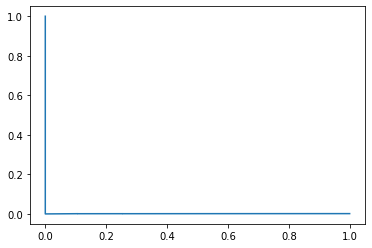

Air sous la courbe :  0.001252606385929021


In [84]:
value, f1_score, precision, recall = evaluation(score_pred, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

# LOF --Cat:Signa

In [85]:
clf_name = 'LOF'
clf = LOF()
clf.fit(df_signa)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [86]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

<ipython-input-20-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


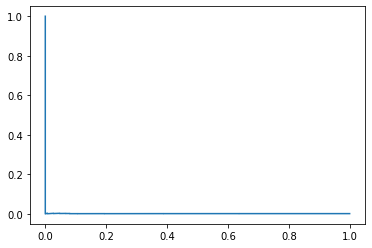

Air sous la courbe :  0.0015158938941935984


In [87]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

In [51]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99651   200]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


# IFOREST-Cat:SIGNA

In [52]:
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(df_signa)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Python\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-9b6e134375d1>", line 3, in <module>
    clf.fit(df_signa)
  File "C:\Python\lib\site-packages\pyod\models\iforest.py", line 230, in fit
    self.detector_.fit(X=X, y=None, sample_weight=None)
  File "C:\Python\lib\site-packages\sklearn\ensemble\_iforest.py", line 289, in fit
    self.offset_ = np.percentile(self.score_samples(X),
  File "C:\Python\lib\site-packages\sklearn\ensemble\_iforest.py", line 387, in score_samples
    return -self._compute_chunked_score_samples(X)
  File "C:\Python\lib\site-packages\sklearn\ensemble\_iforest.py", line 417, in _compute_chunked_score_samples
    scores[sl] = self._compute_score_samples(X[sl], subsample_features)
  File "C:\Python\lib\site-packages\sklearn\ensemble\_iforest.py", line 441, in _compute_score_samples
    node_indicator = tree.de

TypeError: object of type 'NoneType' has no len()

In [22]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


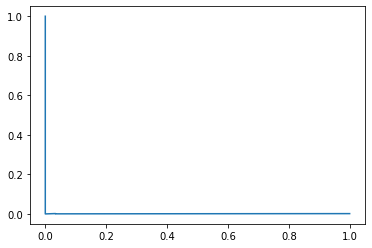

Air sous la courbe :  0.00115020426276943


In [27]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [35]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97853  1998]
 [  147     2]]
Precision : 0.001
Recall : 0.013422818791946308
F1_Score : 0.0018613308515588649


# MCD Cat:SIGNA

In [69]:
clf_name = 'MCD'
clf = MCD()
clf.fit(df_signa)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [72]:
score_pred = clf.decision_scores_*-1
score_pred = np.nan_to_num(score_pred) 
score_pred

array([-4.29281925e+06, -7.48495628e+03, -1.33227349e+01, ...,
       -5.16581855e+04, -2.38716098e+03, -2.52190306e+02])

In [73]:
y_pred = clf.predict(df_signa)
y_pred


array([1, 0, 0, ..., 0, 0, 0])

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


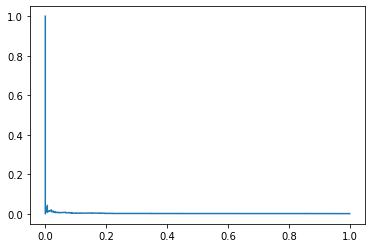

Air sous la courbe :  0.0028622758338952867


In [74]:
value, f1_score, precision, recall = evaluation(score_pred, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [77]:
 tn, fp, fn, tp = evaluation3(score_pred , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99654   197]
 [  146     3]]
Precision : 0.015
Recall : 0.020134228187919462
F1_Score : 0.017191977077363897


# HBOS--Cat:SIGNA

In [88]:
    clf_name = 'HBOS'
    clf = HBOS()
    clf.fit(df_signa)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [89]:
    y_pred = clf.labels_
    y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


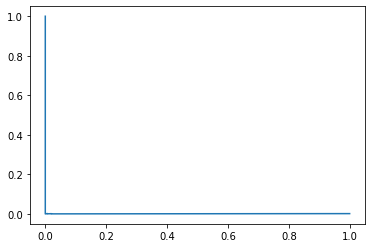

Air sous la courbe :  0.000913784392245923


In [91]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [94]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97853  1998]
 [  147     2]]
Precision : 0.001
Recall : 0.013422818791946308
F1_Score : 0.0018613308515588649


# PCA --Cat:SIGNA

In [108]:
clf_name = 'PCA'
clf = PCA(n_components=3)
clf.fit(df_signa)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=3,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [110]:
    y_pred = clf.labels_
    y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


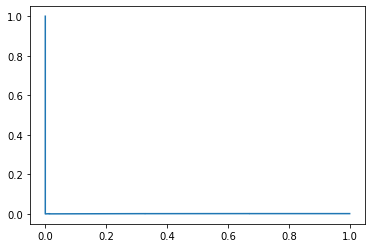

Air sous la courbe :  0.0013600325615577553


In [111]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)

In [114]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99651   200]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


# Test Categorie Autres

In [36]:
autre = []
for i in categories['AUTRE']:
    if pd.isna(i)==False:
        autre.append(i)
autre =  np.array(autre)

autre


array(['top_situ_particuliere'], dtype='<U21')

In [37]:
df_autre = df[autre]
#df_eco = pd.concat([df2, df1], axis=1)
df_autre

,top_situ_particuliere
0,0.103256
1,0.000612
2,0.000000
3,0.000126
4,0.000000
...,...
99995,0.000000
99996,0.000000
99997,0.006269
99998,0.000000


# Abod -- Cat:Autre

In [15]:
outliers_fraction = 0.01
clf = ABOD(contamination=outliers_fraction,n_neighbors = 5)
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [16]:
clf.fit(df_autre)

C:\Python\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Python\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ABOD(contamination=0.01, method='fast', n_neighbors=5)

In [17]:
score_pred = clf.decision_scores_*-1
score_pred = np.nan_to_num(score_pred) 
score_pred

array([1.46196141e+19, 1.71904532e+25, 0.00000000e+00, ...,
       3.16738894e+19, 0.00000000e+00, 0.00000000e+00])

In [19]:
y_pred = clf.predict(df_autre)
y_pred

C:\Python\lib\site-packages\numpy\core\fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Python\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Python\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([0, 0, 0, ..., 0, 0, 0])

<ipython-input-20-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


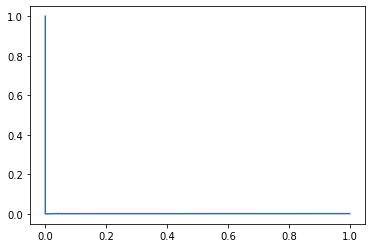

Air sous la courbe :  0.001228103765343146


In [22]:
value, f1_score, precision, recall = evaluation(score_pred, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

# IFOREST-- Cat:Autre

In [33]:
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(df_autre)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [32]:
y_pred = clf.predict(df_autre)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

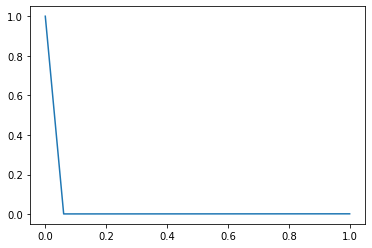

Air sous la courbe :  0.03138646517967997


In [33]:
value, f1_score, precision, recall = evaluation(y_pred, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

In [40]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99651   200]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


# LOF --Cat:Autre

In [53]:
clf_name = 'LOF'
clf = LOF()
clf.fit(df_autre)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [54]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


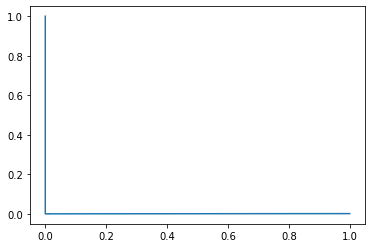

Air sous la courbe :  0.00118584304755305


In [55]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

In [60]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],2)

TN / FP 
FN / TP
[[97851  2000]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


# HBOS --Cat:autre

In [95]:
    clf_name = 'HBOS'
    clf = HBOS()
    clf.fit(df_autre)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [96]:
y_pred = clf.labels_
y_scores = clf.decision_scores_

<ipython-input-26-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


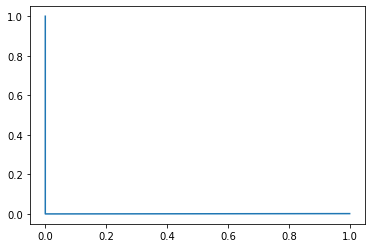

Air sous la courbe :  0.000745


In [97]:
value, f1_score, precision, recall = evaluation(y_scores, data["TOP_FRAUDE"], display=True)
print("Air sous la courbe : ", value)  

In [100]:
 tn, fp, fn, tp = evaluation3(y_scores , data['TOP_FRAUDE'],0.2)

TN / FP 
FN / TP
[[99667   184]
 [  149     0]]
Precision : 0.0
Recall : 0.0
F1_Score : nan


<ipython-input-9-2c33566eaa1e>:21: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


# PCA Cat:Autre